# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv('master_api.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data=requests.get(btc_url)
btc_data = btc_data.json()

# Fetch current ETH price
eth_data=requests.get(eth_url)
eth_data = eth_data.json()
# Compute current value of my crpto.
# NOTE: MARKING RUBRIC ASKS FOR THE PRICE TO BE IN USD - INCONSISTENT WITH INSTRUCTIONS PROVIDED, WHICH INSTRUCT TO FETCH PRICE IN CAD
my_btc_value=my_btc*float(btc_data['data']['1']['quotes']['USD']['price'])
my_eth_value=my_eth*float(eth_data['data']['1027']['quotes']['USD']['price'])
display(btc_data['data']['1']['quotes']['USD']['price'])
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

21585.0

The current value of your 1.2 BTC is $25902.00
The current value of your 5.3 ETH is $9305.63


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key=os.getenv("alpaca_api_key")
alpaca_secret_key=os.getenv("alpaca_secret_key")

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2022-09-09", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(tickers,timeframe,start = today,end = today).df

# Reorganize the DataFrame
# Separate ticker data
agg = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
spy = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([agg, spy],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio.head()

AGG                                             \
                            open    high    low  close   volume trade_count   
timestamp                                                                     
2022-09-09 04:00:00+00:00  99.99  100.13  99.73  99.78  7468304       21954   

                                         SPY                                   \
                                vwap    open    high     low  close    volume   
timestamp                                                                       
2022-09-09 04:00:00+00:00  99.883026  402.77  407.51  402.46  406.6  76514124   

                                                  
                          trade_count       vwap  
timestamp                                         
2022-09-09 04:00:00+00:00      483283  405.48584

In [9]:
# Pick AGG and SPY close prices
agg_close_price=float(df_portfolio['AGG']['close'])
spy_close_price=float(df_portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $99.78
Current SPY closing price: $406.6


In [10]:
# Compute the current value of shares
my_spy_value=my_agg*agg_close_price
my_agg_value=my_spy*spy_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19956.00
The current value of your 200 AGG shares is $20330.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income=12000

# Consolidate financial assets data
crypto=my_btc_value+my_btc_value
shares=my_spy_value+my_agg_value

# Create savings DataFrame
df_savings=pd.DataFrame(['crypto','shares'])
df_savings=df_savings.set_index([0],drop=True)
df_savings['amount']=[crypto,shares]
# Display savings DataFrame
display(df_savings)

,amount
0,
crypto,51804.0
shares,40286.0


array([<AxesSubplot:ylabel='amount'>], dtype=object)

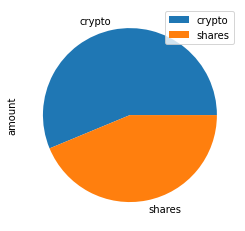

In [12]:
# Plot savings pie chart
df_savings.plot(kind='pie',subplots=True)

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings_total=df_savings.sum()
savings_total=savings_total['amount']

# Validate saving health
if savings_total>emergency_fund:
    print('Congratulations! You have enough savings in your emergency fund.')
elif savings_total==emergency_fund:
    print('Congratulations! You have reached your emergency fund financial goal.')
else:
    print(f'Dear client, you are ${emergency_fund-savings_total} away from reaching your emergency fund financial goal.')        


Congratulations! You have enough savings in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-09-09', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-09-09', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(tickers,timeframe,start = start_date,end = end_date).df

# Reorganize the DataFrame
# Separate ticker data
agg = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
spy = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
portfolio_stock_data=pd.concat([agg,spy],axis=1, keys=['AGG','SPY'])

# Display sample data
portfolio_stock_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2017-09-11 04:00:00+00:00  110.27  110.29  110.10  110.14  2492743   
2017-09-12 04:00:00+00:00  110.04  110.06  109.92  109.98  2403562   
2017-09-13 04:00:00+00:00  110.00  110.04  109.86  109.87  1304102   
2017-09-14 04:00:00+00:00  109.81  109.97  109.81  109.93  1704216   
2017-09-15 04:00:00+00:00  110.00  110.04  109.86  109.91  2818046   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2017-09-11 04:00:00+00:00       10614  110.194231  248.04  249.30  248.02   
2017-09-12 04:00:00+00:00        8614  109.979269  249.64  250.09  249.42   
2017-09-13 04:00:00+00:00        6565  109.926598  249.73  250.21  249.59   
2017-09-14 04:00:00+00:00        7111  109.914840  249.83  250.32  249.60   
2017-09-15 04:00:00+00:00        7997  109.928798  248.70  249.29  248.57   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2017-09-11 04:00:00+00:00  249.21  71364848      211601  248.758253  
2017-09-12 04:00:00+00:00  250.05  56896027      192649  249.791314  
2017-09-13 04:00:00+00:00  250.17  59228002      147055  250.040408  
2017-09-14 04:00:00+00:00  250.09  95446349      188794  250.052841  
2017-09-15 04:00:00+00:00  249.19  95432382      186880  249.026860

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
import MCForecastTools as MC #Decided to include the import line here where it will be used
port_weights=[0.4,0.6]
timeframe=252*30

In [17]:
# Printing the simulation input data
portfolio_stock_data #Note that the MCSimulation module in MCForecastTools includes a subroutine that checks whether or not daily returns have been calculated and calculates them if not.

AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2017-09-11 04:00:00+00:00  110.27  110.29  110.100  110.14  2492743   
2017-09-12 04:00:00+00:00  110.04  110.06  109.920  109.98  2403562   
2017-09-13 04:00:00+00:00  110.00  110.04  109.860  109.87  1304102   
2017-09-14 04:00:00+00:00  109.81  109.97  109.810  109.93  1704216   
2017-09-15 04:00:00+00:00  110.00  110.04  109.860  109.91  2818046   
...                           ...     ...      ...     ...      ...   
2022-09-02 04:00:00+00:00  100.37  100.67  100.130  100.36  5963968   
2022-09-06 04:00:00+00:00   99.96   99.97   99.410   99.42  5105618   
2022-09-07 04:00:00+00:00   99.73  100.13   99.720  100.11  3602611   
2022-09-08 04:00:00+00:00  100.00  100.18   99.785   99.79  5409039   
2022-09-09 04:00:00+00:00   99.99  100.13   99.730   99.78  7468304   

                                                      SPY                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2017-09-11 04:00:00+00:00       10614  110.194231  248.04  249.300  248.02   
2017-09-12 04:00:00+00:00        8614  109.979269  249.64  250.090  249.42   
2017-09-13 04:00:00+00:00        6565  109.926598  249.73  250.210  249.59   
2017-09-14 04:00:00+00:00        7111  109.914840  249.83  250.320  249.60   
2017-09-15 04:00:00+00:00        7997  109.928798  248.70  249.290  248.57   
...                               ...         ...     ...      ...     ...   
2022-09-02 04:00:00+00:00       18228  100.362232  400.30  401.555  390.33   
2022-09-06 04:00:00+00:00       20910   99.547845  393.13  394.120  388.42   
2022-09-07 04:00:00+00:00       15080   99.986643  390.37  398.590  390.20   
2022-09-08 04:00:00+00:00       15792   99.984992  395.45  400.860  394.12   
2022-09-09 04:00:00+00:00       21954   99.883026  402.77  407.510  402.46   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2017-09-11 04:00:00+00:00  249.21  71364848      211601  248.758253  
2017-09-12 04:00:00+00:00  250.05  56896027      192649  249.791314  
2017-09-13 04:00:00+00:00  250.17  59228002      147055  250.040408  
2017-09-14 04:00:00+00:00  250.09  95446349      188794  250.052841  
2017-09-15 04:00:00+00:00  249.19  95432382      186880  249.026860  
...                           ...       ...         ...         ...  
2022-09-02 04:00:00+00:00  392.24  98944421      637607  395.381705  
2022-09-06 04:00:00+00:00  390.76  75551777      552658  391.263275  
2022-09-07 04:00:00+00:00  397.78  70572980      486383  395.276386  
2022-09-08 04:00:00+00:00  400.38  80177250      549029  398.315491  
2022-09-09 04:00:00+00:00  406.60  76514124      483283  405.485840  

[1259 rows x 14 columns]

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
output_data=MC.MCSimulation(portfolio_stock_data,weights=port_weights,num_simulation=500, num_trading_days=timeframe)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\alexr\Desktop\FinTech\Module 5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

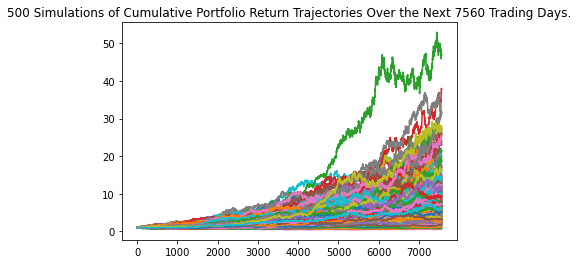

In [19]:
# Plot simulation outcomes
output_data.plot_simulation()

count           500.000000
mean              7.357063
std               5.750957
min               0.512084
25%               3.589384
50%               5.684127
75%               9.484622
max              46.786683
95% CI Lower      1.702870
95% CI Upper     24.559685
Name: 7560, dtype: float64

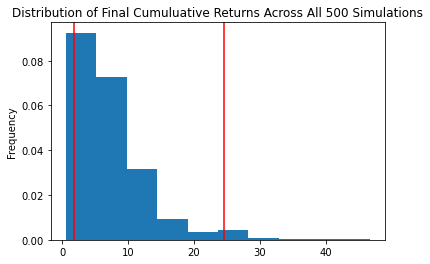

In [20]:
# Plot probability distribution and confidence intervals
output_data.plot_distribution()
output_data.summarize_cumulative_return()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_results=pd.DataFrame(output_data.summarize_cumulative_return())
MC_results.columns=['value']
# Print summary statistics
display(MC_results)

,value
count,500.000000
mean,7.357063
std,5.750957
min,0.512084
25%,3.589384
50%,5.684127
75%,9.484622
max,46.786683
95% CI Lower,1.702870
95% CI Upper,24.559685


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower=initial_investment*float(MC_results.loc['95% CI Lower'])
ci_upper=initial_investment*float(MC_results.loc['95% CI Upper'])

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:0.2f} and ${ci_upper:0.2f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $34057.39 and $491193.71


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower=initial_investment*float(MC_results.loc['95% CI Lower'])
ci_upper=initial_investment*float(MC_results.loc['95% CI Upper'])

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:0.2f} and ${ci_upper:0.2f}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $51086.09 and $736790.56


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
timeframe=252*5

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
output_data_early=MC.MCSimulation(portfolio_stock_data,weights=port_weights,num_simulation=500, num_trading_days=timeframe)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\alexr\Desktop\FinTech\Module 5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

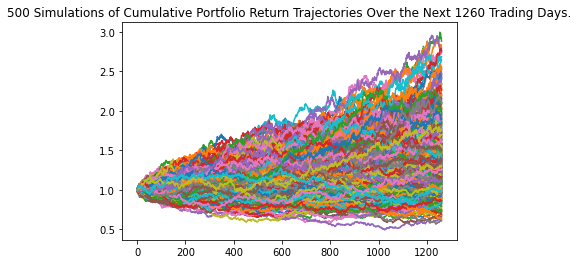

In [28]:
# Plot simulation outcomes
output_data_early.plot_simulation()

count           500.000000
mean              1.400914
std               0.415276
min               0.609520
25%               1.108451
50%               1.345332
75%               1.612519
max               2.882877
95% CI Lower      0.734597
95% CI Upper      2.428897
Name: 1260, dtype: float64

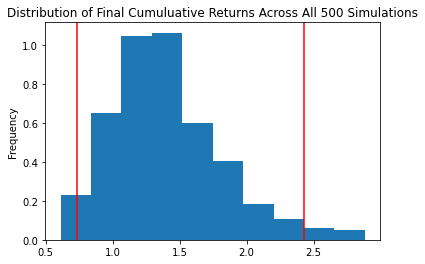

In [29]:
# Plot probability distribution and confidence intervals
output_data_early.plot_distribution()
output_data_early.summarize_cumulative_return()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_results_early=pd.DataFrame(output_data_early.summarize_cumulative_return())
MC_results_early.columns=['value']

# Print summary statistics
display(MC_results_early)

,value
count,500.000000
mean,1.400914
std,0.415276
min,0.609520
25%,1.108451
50%,1.345332
75%,1.612519
max,2.882877
95% CI Lower,0.734597
95% CI Upper,2.428897


In [31]:
# Set initial investment
initial_investment_early=20000 * 3
port_weights=[0.4,0.6]
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five=initial_investment_early*float(MC_results_early.loc['95% CI Lower'])
ci_upper_five=initial_investment_early*float(MC_results_early.loc['95% CI Upper'])

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_early} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:0.2f} and ${ci_upper_five:0.2f}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $44075.84 and $145733.80


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
timeframe=10*252
port_weights=[0.2,0.8]

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
output_data_ten=MC.MCSimulation(portfolio_stock_data,weights=port_weights,num_simulation=500, num_trading_days=timeframe)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\alexr\Desktop\FinTech\Module 5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

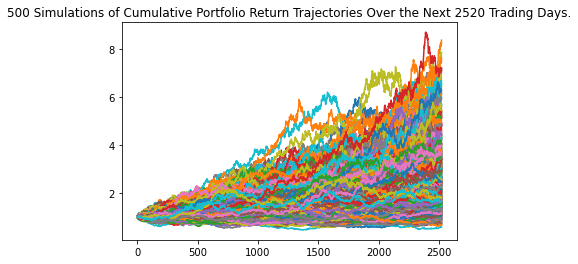

In [34]:
# Plot simulation outcomes
output_data_ten.plot_simulation()

count           500.000000
mean              2.572923
std               1.385587
min               0.558260
25%               1.566113
50%               2.284370
75%               3.279540
max               8.373086
95% CI Lower      0.825236
95% CI Upper      6.219418
Name: 2520, dtype: float64

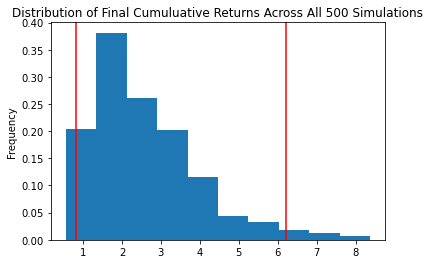

In [35]:
# Plot probability distribution and confidence intervals
output_data_ten.plot_distribution()
output_data_ten.summarize_cumulative_return()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_results_ten=pd.DataFrame(output_data_ten.summarize_cumulative_return())
MC_results_ten.columns=['value']

# Print summary statistics
display(MC_results_ten)

,value
count,500.000000
mean,2.572923
std,1.385587
min,0.558260
25%,1.566113
50%,2.284370
75%,3.279540
max,8.373086
95% CI Lower,0.825236
95% CI Upper,6.219418


In [37]:
# Set initial investment
initial_investment_ten=20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten=initial_investment_ten*float(MC_results_ten.loc['95% CI Lower'])
ci_upper_ten=initial_investment_ten*float(MC_results_ten.loc['95% CI Upper'])

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:0.2f} and ${ci_upper_ten:0.2f}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $49514.14 and $373165.06


# Question:
## Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years? 
### Answer:
No, because the stock portfolio is affected by the timeframe.  Considering the lower bound 95% confidence level returns on the stocks, the 10 year investment is observed to be ~50% higher than that of the 30 year investment, but that is because of the higher initial investment of 60k. In fact, the return on investment is approx. 0.8 -- a loss of 20% on initial investment. In contrast, the return on investment for the 30-yr period is approximately 1.7. Furthermore, if the upper bound 95% confidence level returns is considred, the 30-yr return on investment (24.5) is also seen to outperfom the 10-yr return (6.22) by approximately a factor of approx. 4.

